# Análise de Dados Prelimares do Dataset
### Amazon Prime TV & Shows

In [1]:
# Importando libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Avisos
import warnings
warnings.filterwarnings('ignore')

#Configuração do Pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Configuração Matplotlib
plt.rcParams["figure.figsize"] = (15,6)



In [2]:
# Import de dataset raw
raw_dataset = pd.read_csv('../../data/raw/dataset_origin.csv')

#Principais dados
raw_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [3]:
# Check columns
raw_dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
# Obter o número de linhas e colunas do dataset
num_linhas, num_colunas = raw_dataset.shape

# Imprimir o resultado
print("Número de linhas:", num_linhas)
print("Número de colunas:", num_colunas)

Número de linhas: 9668
Número de colunas: 12


In [5]:
# Estatísticas sobre os dados
raw_dataset.describe().round(2)

,release_year
count,9668.00
mean,2008.34
std,18.92
min,1920.00
25%,2007.00
50%,2016.00
75%,2019.00
max,2021.00


In [6]:
# Verificar dados duplicados
raw_dataset.duplicated().sum()

0

In [7]:
# Informações sobre os dados
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [8]:
# Filtrar filmes lançados após 2010
filmes_2010 = raw_dataset[raw_dataset['release_year'] > 2010]

# Visualizar os filmes filtrados
filmes_2010.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
6,s7,Movie,Hired Gun,Fran Strine,"Alice Cooper, Liberty DeVitto, Ray Parker Jr.,...",United States,"March 30, 2021",2017,NaN,98 min,"Documentary, Special Interest","They are the ""First Call, A-list"" musicians, j..."
7,s8,Movie,Grease Live!,"Thomas Kail, Alex Rudzinski","Julianne Hough, Aaron Tveit, Vanessa Hudgens, ...",United States,"March 30, 2021",2016,NaN,131 min,Comedy,"This honest, uncompromising comedy chronicles ..."
8,s9,Movie,Global Meltdown,Daniel Gilboy,"Michael Paré, Leanne Khol Young, Patrick J. Ma...",Canada,"March 30, 2021",2017,NaN,87 min,"Action, Science Fiction, Suspense",A helicopter pilot and an environmental scient...
10,s11,Movie,Forest Fairies,Justin G. Dyck,"Emily Wilder, Adrian Cowan, Gary Mckenzie, Jer...",Canada,"April 4, 2021",2016,NaN,88 min,"Adventure, Kids",Amanda stumbles upon a hidden village of fairi...
11,s12,Movie,Take Care,Liz Tuccillo,"Leslie Bibb, Kevin Curtis, Nadia Dajani",United States,"April 10, 2021",2014,NaN,93 min,Comedy,"When a car crash leaves Frannie immobilized, s..."
12,s13,Movie,The Night Eats The World,Dominique Rocher,"Anders Danielsen Lie, Golshifteh Farahani, Den...",France,"April 17, 2021",2018,NaN,94 min,"Horror, Suspense",After waking up in an apartment the night afte...


In [9]:
# Calcular a contagem de filmes por país
contagem_pais = raw_dataset['country'].value_counts()

# Imprimir os resultados
#print("Média de duração dos filmes:", media_duracao)
print("Contagem de filmes por país:")
print(contagem_pais)

Contagem de filmes por país:
country
United States                                               253
India                                                       229
United Kingdom                                               28
Canada                                                       16
United Kingdom, United States                                12
Spain                                                         8
Italy                                                         8
Canada, United States                                         7
United States, United Kingdom                                 6
India, United States                                          5
Germany                                                       5
United States, Canada                                         4
Australia                                                     4
United States, India                                          3
France                                                        3
Uni

In [10]:
# Total de valores ausentes no dataset
raw_dataset.isna().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
# Contagem de valores únicos
raw_dataset.nunique()

show_id         9668
type               2
title           9668
director        5773
cast            7927
country           86
date_added        84
release_year     100
rating            24
duration         219
listed_in        518
description     9414
dtype: int64

In [12]:
raw_dataset.dtypes.value_counts()

object    11
int64      1
Name: count, dtype: int64

In [13]:
# Análise dos campos objetos
raw_dataset['country'].value_counts(normalize=True) * 100 # Porcentagem dos valores

country
United States                                               37.648810
India                                                       34.077381
United Kingdom                                               4.166667
Canada                                                       2.380952
United Kingdom, United States                                1.785714
Spain                                                        1.190476
Italy                                                        1.190476
Canada, United States                                        1.041667
United States, United Kingdom                                0.892857
India, United States                                         0.744048
Germany                                                      0.744048
United States, Canada                                        0.595238
Australia                                                    0.595238
United States, India                                         0.446429
France      

In [14]:
rating_counts = raw_dataset['rating'].value_counts()
rating_counts

rating
13+         2117
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: count, dtype: int64

In [22]:
# Filtrar linhas com valores vazios na coluna "director" com base na coluna "title"
dados_vazios = raw_dataset.loc[raw_dataset['director'].isnull(), 'title']

# Exibir os dados vazios na coluna "director"
dados_vazios.value_counts().sum()

2083

## Gráficos

In [15]:
# Definindo a paleta de cores dos gráficos

colors = sns.color_palette('dark', 8)
colors

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882)]

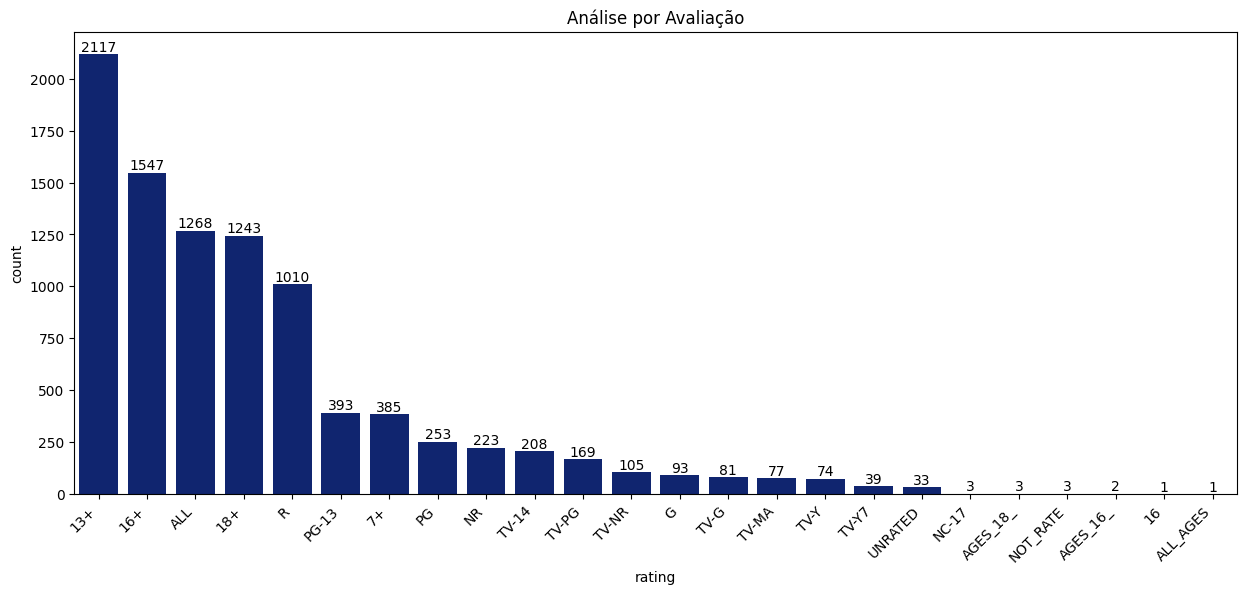

In [16]:

# Define o estilo do seaborn
sns.set_palette(colors)

# Cria o gráfico usando seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x=raw_dataset['rating'].value_counts().index, y=raw_dataset['rating'].value_counts())

# Adiciona os valores em cima das barras
for index, value in enumerate(raw_dataset['rating'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Análise por Avaliação')
plt.xticks(rotation=45, ha='right')
plt.show()


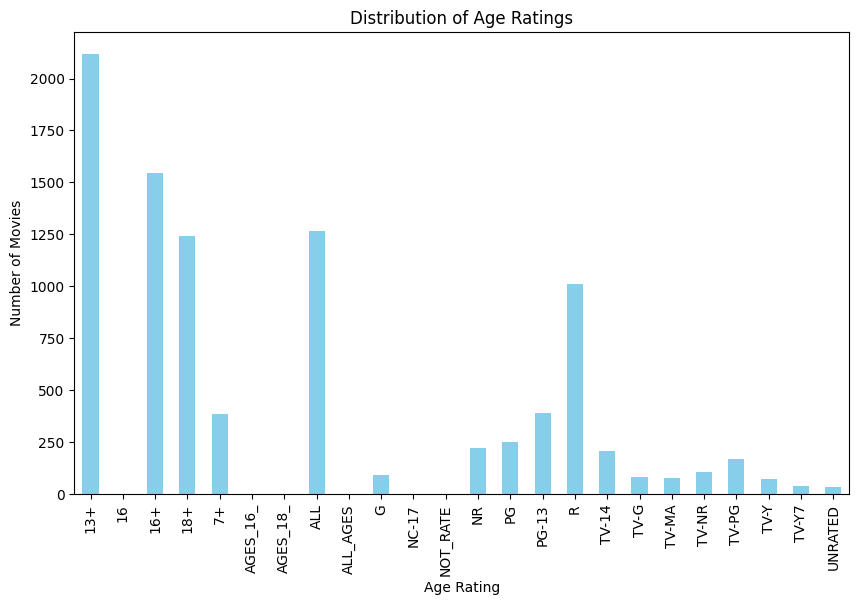

In [17]:
plt.figure(figsize=(10, 6))
rating_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Age Ratings')
plt.xlabel('Age Rating')
plt.ylabel('Number of Movies')
plt.show()